p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=2.269e-02 stat=-5.052e+00
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=2.395e-02 stat=8.003e+00
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=5.192e-01 stat=1.863e+00


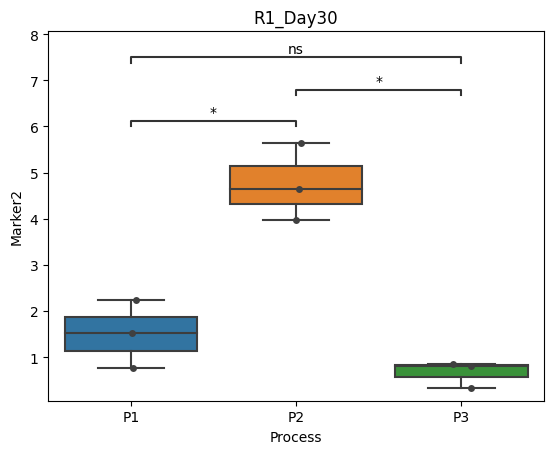

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.722e-01
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-4.843e-01
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.154e-01


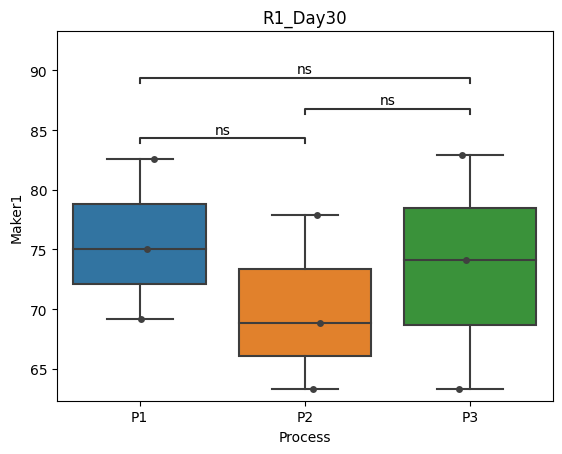

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=4.396e-02 stat=-4.886e+00
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=3.702e-02 stat=4.709e+00
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.259e-01


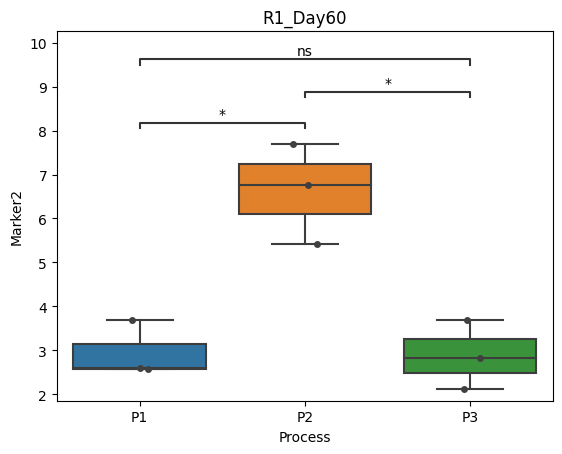

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=2.916e-01 stat=2.638e+00
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=2.855e-01 stat=-2.728e+00
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.440e-01


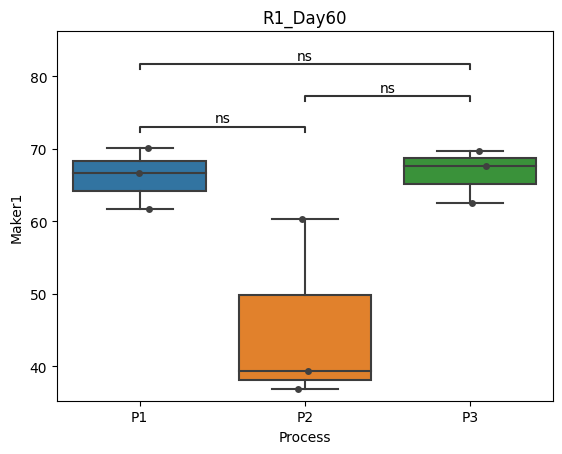

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=6.988e-03 stat=6.945e+00
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.858e-01
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=9.250e-01 stat=1.308e+00


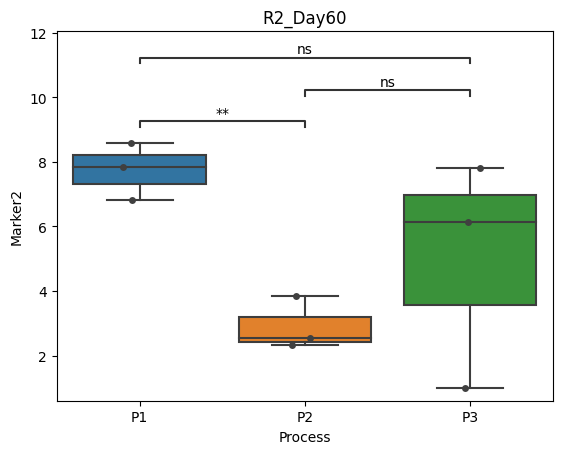

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

P1 v.s. P2: Welch's t-test independent samples with Bonferroni correction, P_val=2.329e-01 stat=-2.924e+00
P2 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=2.127e-01 stat=3.011e+00
P1 v.s. P3: Welch's t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.088e-02


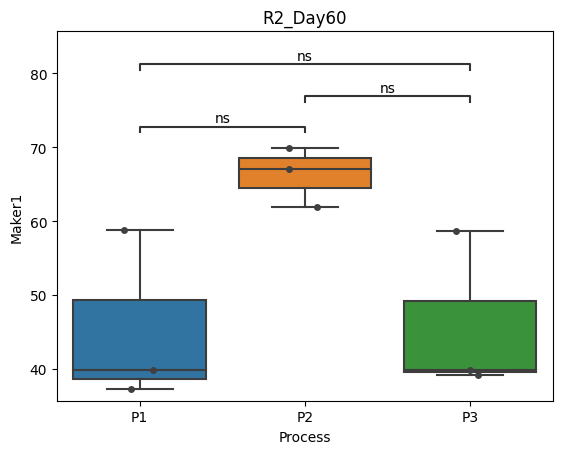

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from statannot import add_stat_annotation

# Read the CSV file into a DataFrame
df = pd.read_csv("data/exampledata_1.csv")

# Loop through unique values of 'Round' and 'Day'
for value1 in df['Round'].unique():
    for value2 in df['Day'].unique():
        # Subset the DataFrame based on the unique values
        df_s = df[(df['Round'] == value1) & (df['Day'] == value2)]

        if not df_s.empty:
            # Get unique values of the column of interest
            unique_values = df_s['Process'].unique().tolist()

            # Generate all possible pairs of items
            pairs = list(itertools.combinations(unique_values, 2))

            # Create plots with the significance indication
            for k in [5, 4]:
                plt.figure()
                ax = sns.boxplot(data=df_s, x='Process', y=df_s.iloc[:, k])
                ax = sns.stripplot(data=df_s, x='Process', y=df_s.iloc[:, k], color=".25")
                # add_stat_annotation(ax, data=df_s, x='Process', y=df_s.iloc[:, k], box_pairs=pairs, test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
                add_stat_annotation(ax, data=df_s, x='Process', y=df_s.iloc[:, k], box_pairs=pairs, test='t-test_welch', text_format='star', loc='inside', verbose=2)
                plt.title(f"{value1}_Day{value2}")
                plt.show()